In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.color': 'gray',
    'grid.alpha': 0.3,
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'figure.titlesize': 18,
    'lines.linewidth': 1.5
})

In [6]:
def polynomial_power_r_estimation():
    N = 30
    iterations = 1000
    theta_true = np.array([1, 3, 5])
    r = np.array([1, 2, 3])
    sigma = 1


    H = np.zeros((N, len(r)))
    for n in range(N):
        H[n, :] = r ** n

    def generate_observations(H, theta, sigma):
        noise = np.random.normal(0, sigma, N)
        X = H @ theta + noise
        return X

    theta_estimates = []
    for _ in range(iterations):
        X = generate_observations(H, theta_true, sigma)
        theta_hat = np.linalg.inv(H.T @ H) @ H.T @ X
        theta_estimates.append(theta_hat)
    theta_estimates = np.array(theta_estimates)

    plt.figure()
    colors = ['cyan', 'magenta', 'yellow']
    for i in range(len(theta_true)):
        plt.plot(theta_estimates[:, i], color=colors[i], lw=1.5, label=f'Estimated $\\theta_{i+1}$')
        plt.axhline(theta_true[i], color=colors[i], linestyle='--', lw=2,
                    label=f'True $\\theta_{i+1}$' if i == 0 else None)
    plt.xlabel('Iteration')
    plt.ylabel('Estimated Value')
    plt.title('Polynomial Model Estimation (Powers of r)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


In [7]:


def alternative_polynomial_estimation():
    iterations = 10000  
    P = 4              
    N = 30           
    sigma2 = 1          
    A_true = np.array([1, -1, 2, -2])
    r = np.array([1, 1.2, 1.8, 1.9])

    theta_estimates = np.zeros((iterations, P))
    
    for m in range(iterations):
        X = np.zeros(N)
        for n in range(N):
            X[n] = np.sum([A_true[i] * r[i] ** n for i in range(P)]) + np.random.normal(0, np.sqrt(sigma2))
        
        H = np.zeros((N, P))
        for n in range(N):
            for i in range(P):
                H[n, i] = r[i] ** n

        theta_hat = np.linalg.inv(H.T @ H) @ H.T @ X
        theta_estimates[m] = theta_hat  

    plt.figure()
    color_cycle = ['lime', 'orange', 'cyan', 'magenta']
    for i in range(P):
        plt.plot(range(iterations), theta_estimates[:, i],
                 color=color_cycle[i], lw=1, label=f'Estimated $A_{i+1}$')
    plt.xlabel('Iteration')
    plt.ylabel('Estimated Value')
    plt.title('Alternative Polynomial Parameter Estimation')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(P, 1, figsize=(10, 10), tight_layout=True)
    for i in range(P):
        axs[i].hist(theta_estimates[:, i], bins=30, color=color_cycle[i], alpha=0.8)
        axs[i].set_title(f'Histogram of $A_{{{i+1}}}$ Estimates')
        axs[i].set_xlabel('Estimated Value')
        axs[i].set_ylabel('Frequency')
    plt.show()



In [8]:
def fourier_series_estimation():
    N = 20000          
    sigma = 1       
    M_coeffs = 5   
    iterations = 1000  


    a_true = np.array([1, 1.5, 4, 5.5, 5.7, 6])
    b_true = np.zeros(M_coeffs + 1)

    n = np.arange(N)


    H = np.zeros((N, 2 * M_coeffs))
    for k in range(1, M_coeffs + 1):
        H[:, 2 * (k - 1)] = np.cos(2 * np.pi * k * n / N)
        H[:, 2 * (k - 1) + 1] = np.sin(2 * np.pi * k * n / N)

    HtH_inv = np.linalg.inv(H.T @ H)

    theta_estimates = np.zeros((iterations, 2 * M_coeffs))

    for itr in range(iterations):
        x = np.zeros(N)
        for k in range(1, M_coeffs + 1):
            x += a_true[k] * np.cos(2 * np.pi * k * n / N) + b_true[k] * np.sin(2 * np.pi * k * n / N)
        x += np.random.normal(0, sigma, N)

        theta_hat = HtH_inv @ H.T @ x
        theta_estimates[itr, :] = theta_hat

    plt.figure(figsize=(12, 6))
    color_list = plt.cm.tab10(np.linspace(0, 1, 2 * M_coeffs))
    for i in range(2 * M_coeffs):
        plt.plot(theta_estimates[:, i], color=color_list[i],
                 label=f'Estimated $\\theta_{{{i+1}}}$')
    plt.xlabel('Iteration')
    plt.ylabel('Coefficient Estimate')
    plt.title('Fourier Series Coefficient Estimation Over Iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


    nrows, ncols = 5, 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 18), constrained_layout=True)
    axes = axes.flatten()
    for i in range(2 * M_coeffs):
        axes[i].hist(theta_estimates[:, i], bins=30, color=color_list[i], alpha=0.8)
        axes[i].set_title(f'Histogram of $\\theta_{{{i+1}}}$', fontsize=14)
        axes[i].set_xlabel('Estimated Value', fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
    fig.suptitle('Histograms of Fourier Coefficient Estimates', fontsize=18)
    plt.show()

Running polynomial estimation using powers of r...


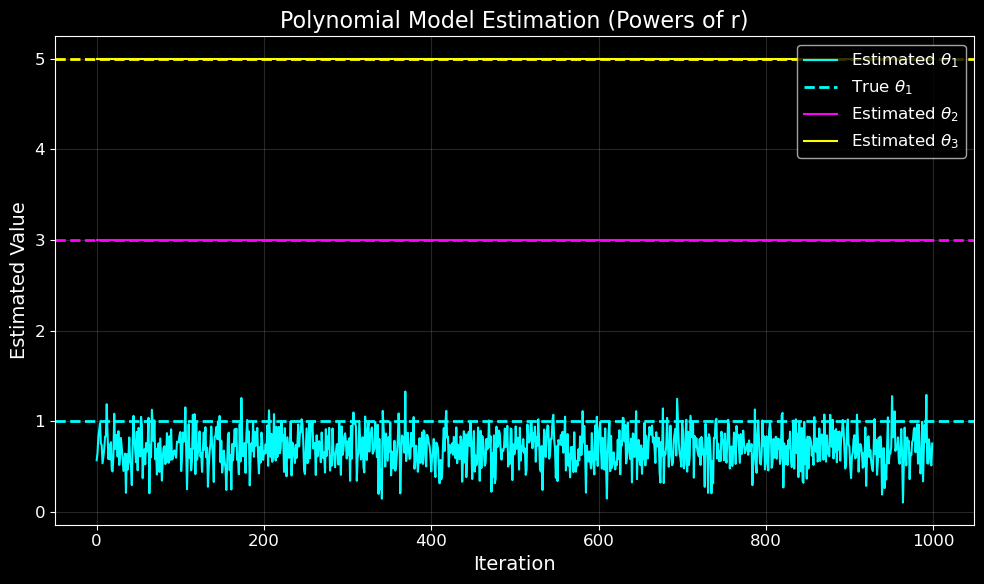

Running alternative polynomial estimation...


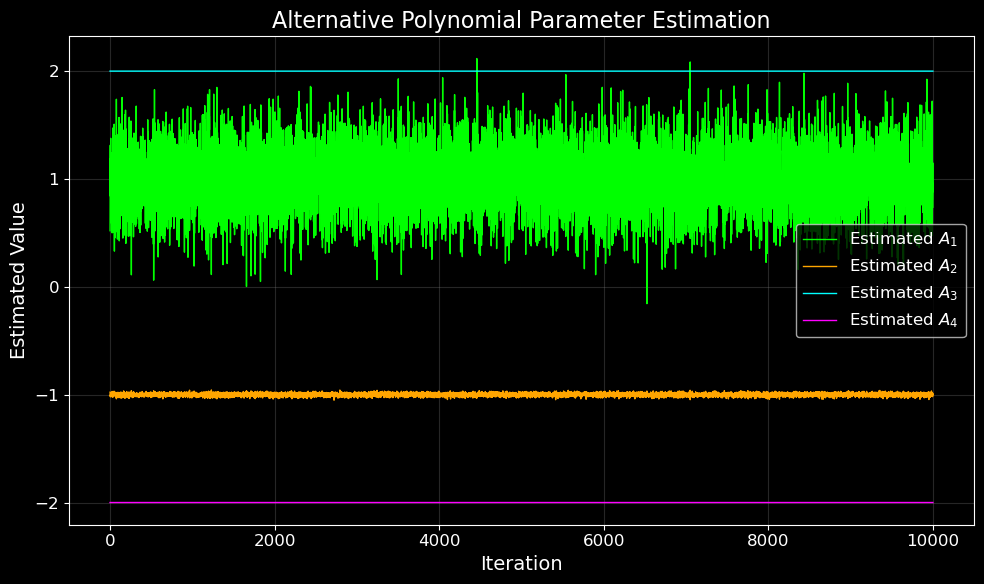

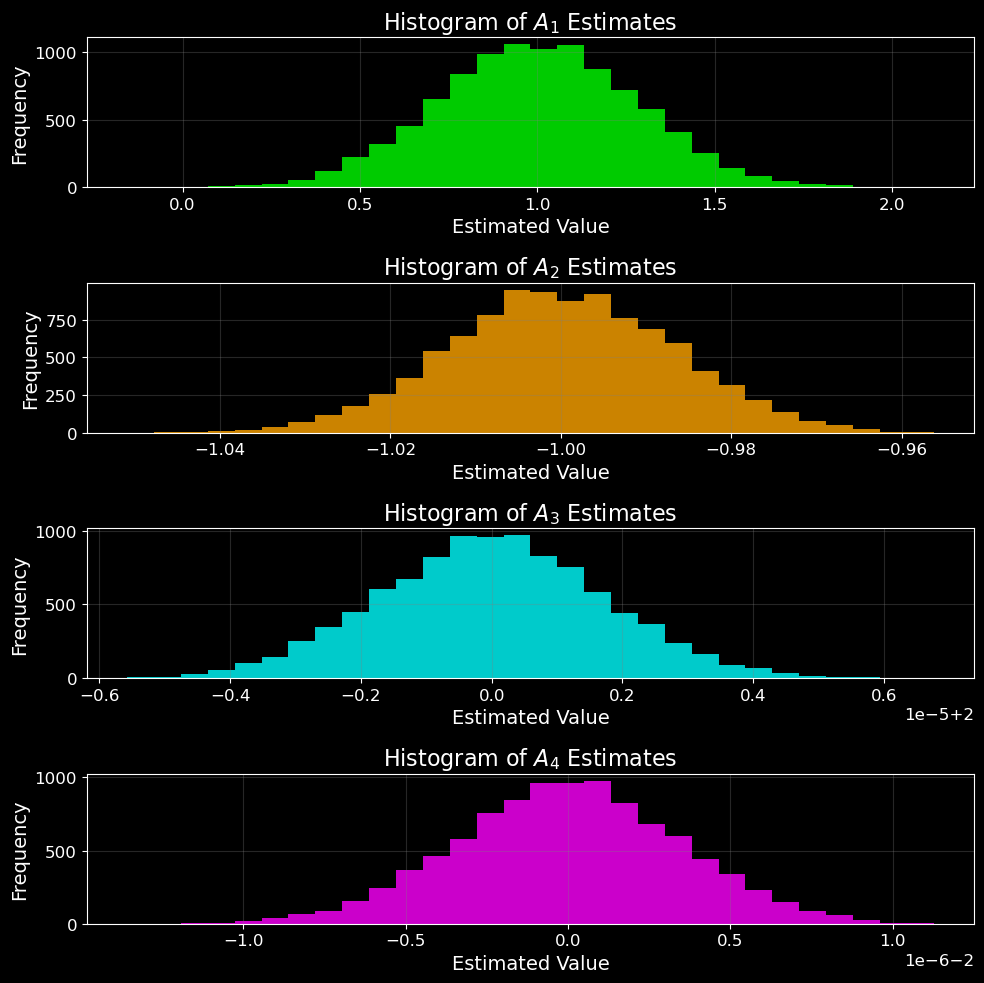

Running Fourier series coefficient estimation...


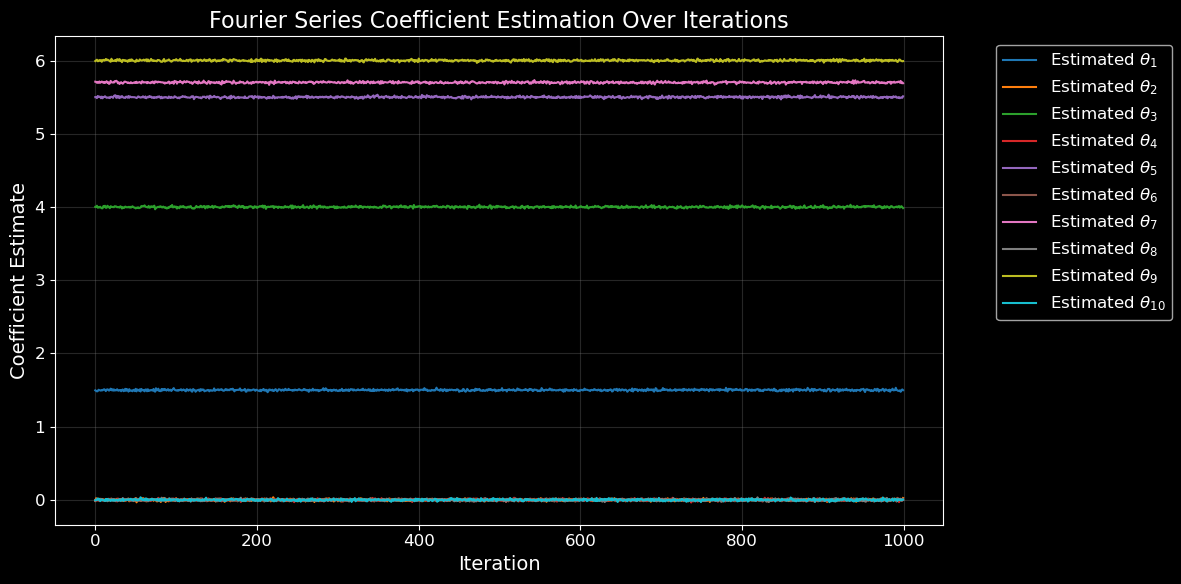

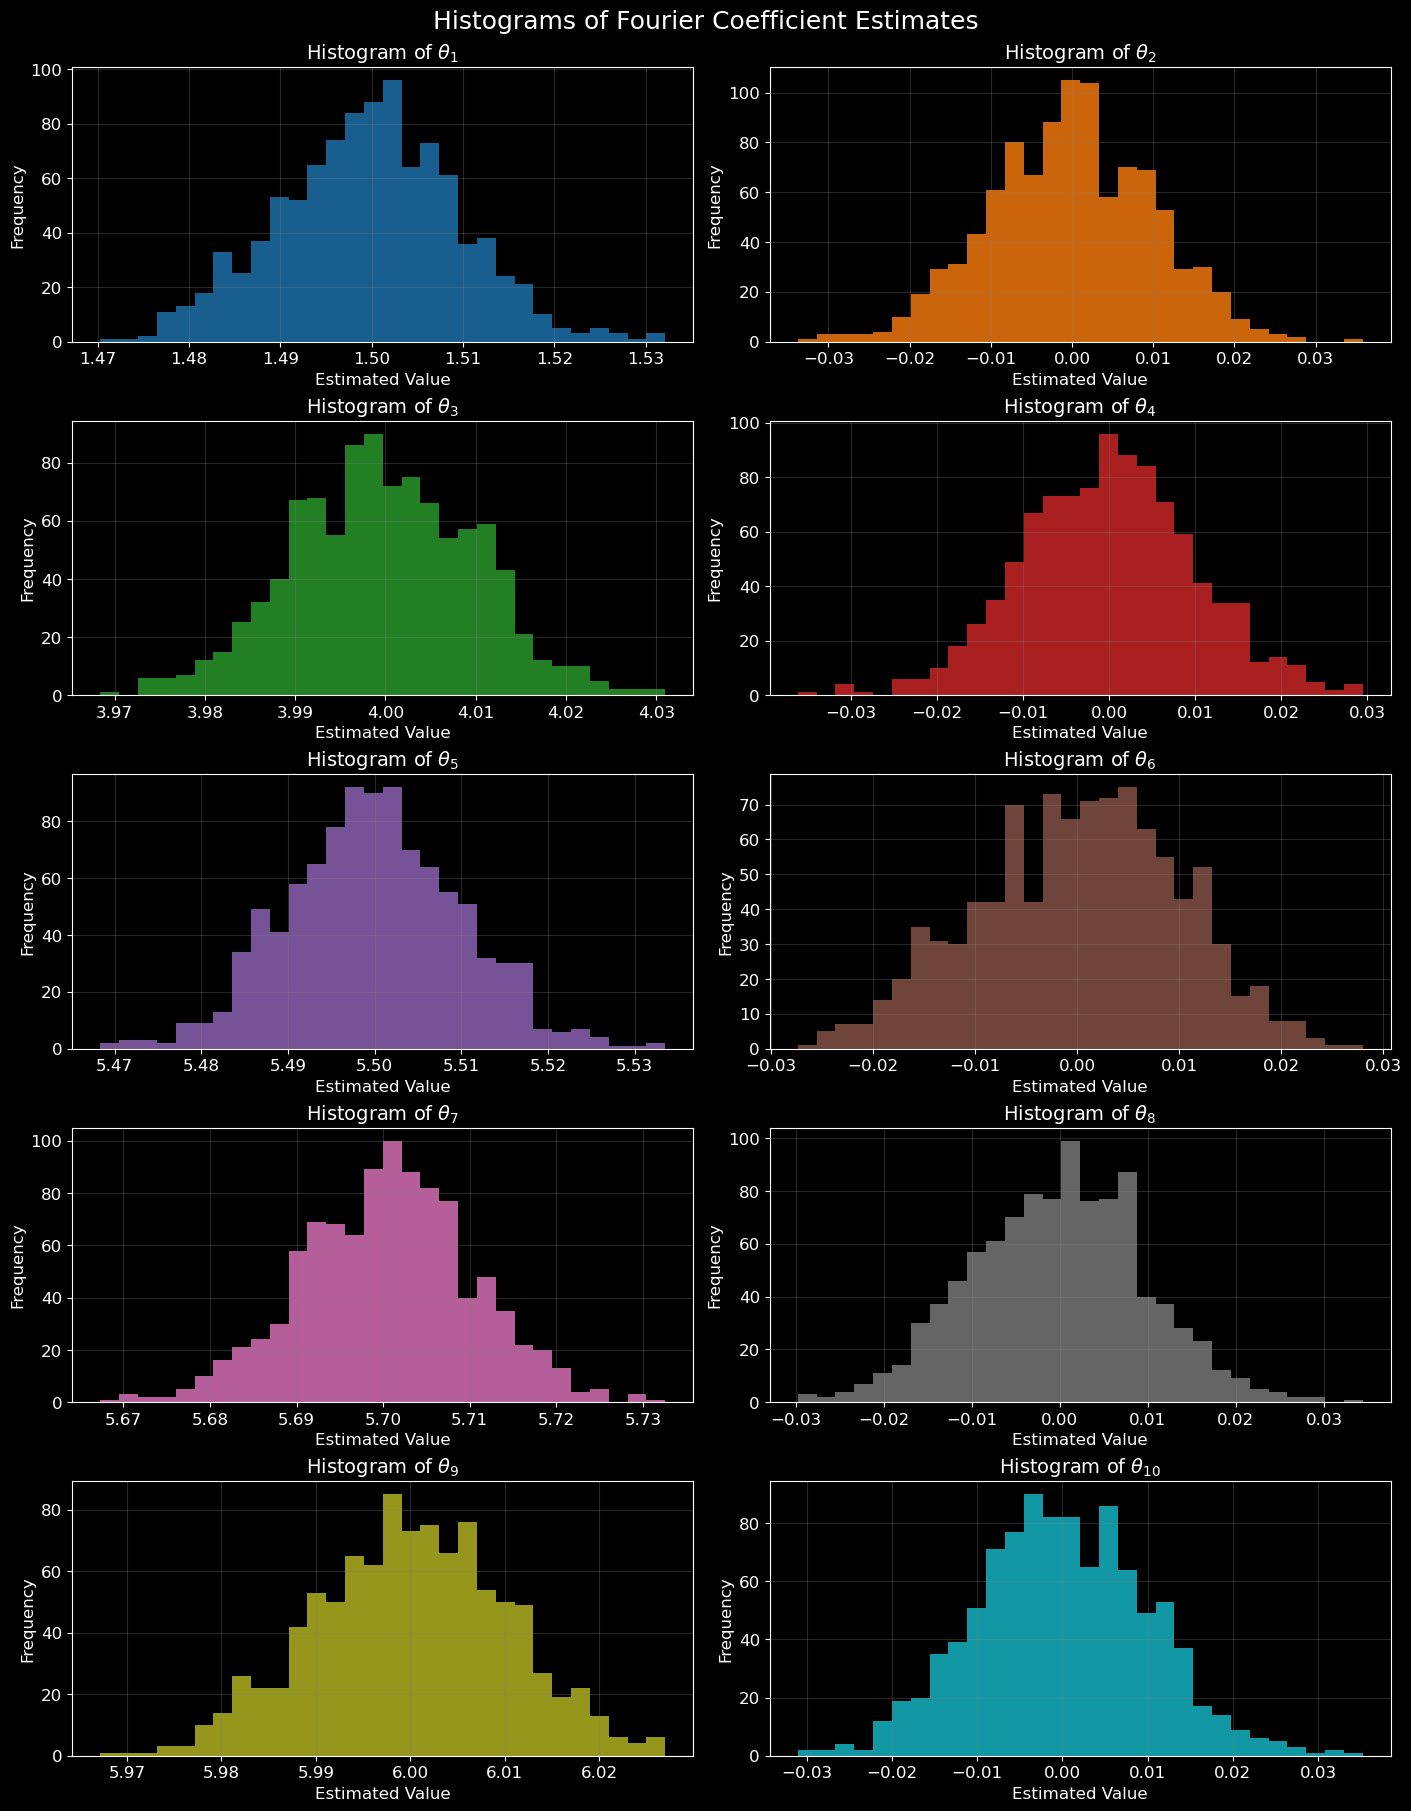

All estimations completed.


In [9]:
if __name__ == '__main__':
    print("Running polynomial estimation using powers of r...")
    polynomial_power_r_estimation()
    
    print("Running alternative polynomial estimation...")
    alternative_polynomial_estimation()
    
    print("Running Fourier series coefficient estimation...")
    fourier_series_estimation()
    
    print("All estimations completed.")